# MNIST NN from scratch

In [40]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [41]:
check = np.zeros((1,10))

In [42]:
check

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [43]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into test and training sets

data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [44]:
Y_train

array([4, 6, 4, ..., 4, 6, 4])

Neural Networks, or NNs, are like interconnected layers of nodes, where each node is like a tiny decision maker. There are three main types of nodes: Input Nodes, Output Nodes, and Hidden Nodes. Input Nodes receive information, Hidden Nodes process it, and Output Nodes produce the final result.

Training a NN involves three main steps: 

NNs are trained in 3 steps : 
1. Forward Propogation
Inputs, such as numbers or images, are passed through the network's layers.Each layer applies weights (like tuning knobs) to the inputs and adds biases (adjustments) to produce an output.
Activation functions (like decision makers) determine if and how the outputs are passed to the next layer. Activation functions allow neural networks to model complex relationships in data by introducing non-linearities. Most common activation functions are  ReLU, SoftPlus, Sigmoid Activation Function. We need activation functions in neural networks to introduce non-linearity into the network. Without activation functions, the entire neural network would behave like a single linear function, no matter how many layers it has. This limitation would severely restrict the network's ability to learn and represent complex patterns in data.

2. Backward Propogation
The network compares its output with the expected output using a loss function (a measure of how wrong it was).It then works backward through the layers to adjust the weights and biases, aiming to reduce the error. This step helps the network learn from its mistakes.

3. Update Pass
With the adjusted weights and biases, the network goes through the process again to make predictions.This iterative process, often repeated many times (epochs), helps the network improve its accuracy over time.

The learning rate controls how much we adjust the weights of our network during training. It is a factor by which the weights are updated in each iteration to move them towards a set of optimal weights that will minimize the loss function.

Users can adjust the network's hyperparameters, such as the number of layers, number of nodes, and learning rate, to fine-tune its performance.


Our NN will have a simple two-layer architecture. Input layer $a^{[0]}$ will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer $a^{[1]}$ will have 16 units with ReLU activation, and finally our output layer $a^{[2]}$ will have 10 units corresponding to the ten digit classes with softmax activation.

**Forward propagation**



$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]}))$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{softmax}}(Z^{[2]})$$

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$

**Vars and shapes**

Forward prop

- $A^{[0]} = X$: 784 x m
- $Z^{[1]} \sim A^{[1]}$: 10 x m
- $W^{[1]}$: 16 x 784 (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
- $B^{[1]}$: 16 x 1
- $Z^{[2]} \sim A^{[2]}$: 10 x m
- $W^{[2]}$: 10 x 16 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)
- $B^{[2]}$: 10 x 1

Backprop

- $dZ^{[2]}$: 10 x m ($~A^{[2]}$)
- $dW^{[2]}$: 10 x 10
- $dB^{[2]}$: 10 x 1
- $dZ^{[1]}$: 10 x m ($~A^{[1]}$)
- $dW^{[1]}$: 10 x 10
- $dB^{[1]}$: 10 x 1

In [45]:
def init_params():
    W1 = np.random.rand(16, 784) - 0.5
    b1 = np.random.rand(16, 1) - 0.5
    W2 = np.random.rand(10, 16) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [46]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    losses = []  # Store loss values for plotting
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        loss = -1 / m_train * np.sum(np.log(A2) * one_hot(Y))
        losses.append(loss)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    # Plotting the loss function
    plt.plot(range(iterations), losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss function over epochs')
    plt.show()
    return W1, b1, W2, b2

Iteration:  0
[9 9 7 ... 7 3 7] [4 6 4 ... 4 6 4]
0.11331707317073171
Iteration:  10
[0 5 8 ... 4 5 7] [4 6 4 ... 4 6 4]
0.2639756097560976
Iteration:  20
[0 5 8 ... 4 6 7] [4 6 4 ... 4 6 4]
0.36829268292682926
Iteration:  30
[0 6 8 ... 4 6 7] [4 6 4 ... 4 6 4]
0.4272439024390244
Iteration:  40
[0 6 8 ... 4 6 7] [4 6 4 ... 4 6 4]
0.47873170731707315
Iteration:  50
[0 6 8 ... 4 6 7] [4 6 4 ... 4 6 4]
0.5227560975609756
Iteration:  60
[0 6 8 ... 4 6 7] [4 6 4 ... 4 6 4]
0.5643170731707317
Iteration:  70
[0 6 8 ... 4 6 7] [4 6 4 ... 4 6 4]
0.6013658536585366
Iteration:  80
[4 6 8 ... 4 6 7] [4 6 4 ... 4 6 4]
0.6340731707317073
Iteration:  90
[4 6 8 ... 4 6 4] [4 6 4 ... 4 6 4]
0.6613902439024391
Iteration:  100
[4 6 9 ... 4 6 4] [4 6 4 ... 4 6 4]
0.6840975609756098
Iteration:  110
[4 6 9 ... 4 6 4] [4 6 4 ... 4 6 4]
0.7039512195121951
Iteration:  120
[4 6 9 ... 4 6 4] [4 6 4 ... 4 6 4]
0.7216585365853658
Iteration:  130
[4 6 9 ... 4 6 4] [4 6 4 ... 4 6 4]
0.7336829268292683
Iteration:  14

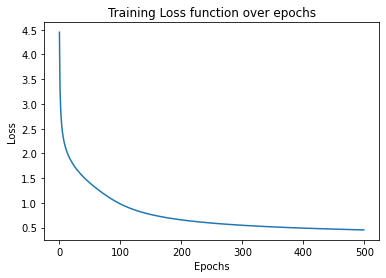

In [47]:
# Learning Rate = 0.10, epochs = 500
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

86% accuracy on training set.

In [48]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Let's look at a couple of examples:

Prediction:  [6]
Label:  6


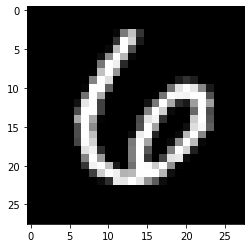

Prediction:  [3]
Label:  3


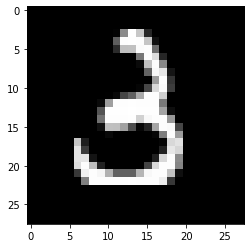

Prediction:  [6]
Label:  6


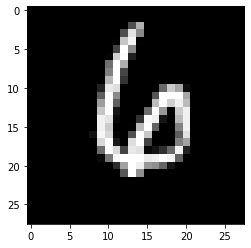

Prediction:  [0]
Label:  0


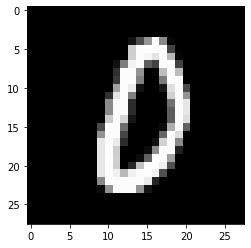

In [49]:
test_prediction(20, W1, b1, W2, b2)
test_prediction(79, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(100, W1, b1, W2, b2)

Finally, let's find the accuracy on the test set:

In [50]:
dev_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_test)

[4 6 6 3 4 0 1 4 5 7 8 9 0 1 1 8 2 3 5 2 9 2 5 4 4 7 9 7 4 6 3 8 0 8 7 7 4
 6 3 9 0 4 8 2 4 1 2 4 7 1 9 7 0 4 1 3 9 1 9 4 4 6 2 9 1 4 4 4 1 6 5 3 3 9
 2 8 6 7 8 9 3 7 4 5 1 9 6 0 2 5 9 1 7 6 4 6 9 1 7 8 8 4 0 3 7 9 5 9 4 9 6
 9 3 9 7 3 3 7 8 4 0 3 7 3 4 0 1 7 9 4 1 1 4 4 5 2 1 9 7 2 8 4 7 7 7 2 2 7
 8 3 0 3 3 6 8 9 0 1 0 2 3 4 4 0 1 6 7 7 6 2 4 8 4 2 4 3 0 3 1 7 4 5 9 8 3
 4 9 5 1 7 6 4 6 0 5 0 0 4 0 9 3 5 9 6 6 9 2 6 1 4 6 7 1 9 6 1 5 9 2 1 5 7
 2 2 5 5 7 2 1 3 3 8 6 1 4 8 5 3 3 7 9 8 0 6 0 1 5 6 6 5 8 4 6 1 0 3 5 6 4
 1 8 9 8 0 0 8 0 2 2 8 1 3 8 8 6 4 7 5 3 0 6 0 7 5 0 8 4 3 3 6 7 1 9 7 8 4
 1 6 2 9 4 4 6 6 6 9 9 1 7 4 1 4 3 0 2 6 2 3 6 4 5 6 0 6 8 6 7 5 7 7 4 9 2
 4 2 9 6 5 5 1 7 2 8 8 3 5 6 4 3 4 9 9 1 2 9 2 9 3 9 0 6 8 5 0 4 7 4 0 7 1
 7 9 8 2 0 4 9 9 3 4 2 2 7 4 2 1 5 6 2 6 4 1 9 6 7 1 3 3 8 8 6 6 6 1 2 9 5
 8 0 7 8 5 4 8 9 9 7 4 3 1 5 0 2 7 7 2 2 1 0 5 2 3 0 6 3 5 7 4 1 7 2 7 9 0
 9 4 6 5 0 9 7 4 3 1 4 0 9 0 0 6 8 6 4 2 7 7 9 6 1 2 2 0 1 3 1 0 5 2 9 1 5
 2 1 8 1 9 4 0 3 7 8 2 0 

0.86

Still 86% accuracy, so our model generalized from the training data pretty well.